In [93]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import sweetviz as sv
px.defaults.template = 'seaborn'
px.defaults.width = 700
px.defaults.height = 500
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',
                   sheet_name='INX_Future_Inc_Employee_Perform')

In [57]:
category_orders = {'PerformanceRating': [2, 3, 4]}
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [6]:
my_report = sv.analyze(df)
my_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [171]:
fig = px.pie(df.sample(frac=1), names='PerformanceRating', color='PerformanceRating', hole=0.3,
             title='Performance Rating Distribution')
fig.show()
fig = px.histogram(df, x='PerformanceRating', color='PerformanceRating',
                   title='Number of data observations', category_orders=category_orders)
fig.show()

In [180]:
cols_numerical = ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
                  'EmpHourlyRate','EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
                  'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
                  'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
                  'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in cols_numerical:
    fig = px.histogram(df, color='PerformanceRating', x=col, title=f'Relationship with {col}',
                       barnorm='percent', category_orders=category_orders)
    fig.show()
    fig = px.histogram(df, color='PerformanceRating', x=col, title=f'Relationship with {col}',
                       category_orders=category_orders)
    fig.show()
    fig = px.violin(df, x=col, color='PerformanceRating',
                   category_orders=category_orders, title=f'Relationship with {col}')
    fig.show()

In [176]:
cols_categorical = ['Gender', 'EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole',
                    'BusinessTravelFrequency', 'OverTime', 'Attrition']

for col in cols_categorical:
    fig = px.histogram(df, x=col, color='PerformanceRating', barnorm='percent',
                       category_orders=category_orders, title=f'Relationship with {col}')
    fig.show()
    fig = px.histogram(df, x=col, color='PerformanceRating',
                   category_orders=category_orders, title=f'Relationship with {col}')
    fig.show()

In [88]:
from scipy.stats import chi2_contingency
#H0 is No correlation
#Lower P Rejection of H0 and association is proven
df_p_values_cat_cols = pd.DataFrame(columns=['pvalues'], index=cols_categorical)
for col in cols_categorical:
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df['PerformanceRating'], df[col]).values)
    df_p_values_cat_cols.at[col, 'pvalues'] = p
px.bar(df_p_values_cat_cols, x=df_p_values_cat_cols.index, color=df_p_values_cat_cols.index, y='pvalues',
       title='chi squared test for correlation')

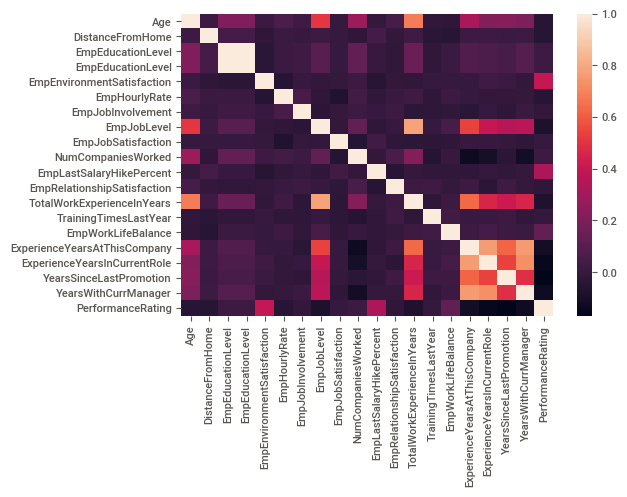

In [117]:
corr_mat = df[cols_numerical + ['PerformanceRating']].corr()
sns.heatmap(corr_mat)

In [142]:
corr_columns = [i for i in corr_mat.columns if i not in ['PerformanceRating']]
corr_df = corr_mat.loc[corr_columns,['PerformanceRating', 'Age']]
px.bar(corr_df,x=corr_df.index, color=corr_df.index,y = 'PerformanceRating',
       title='correlation coeff for numerical features', height=690).update_yaxes(title_text='correlation_coefficient')

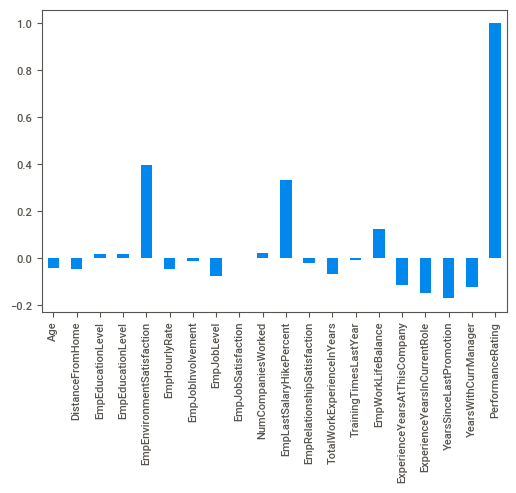

In [121]:
corr_mat.loc['PerformanceRating', :].plot.bar()

In [133]:
corr_mat.loc[corr_columns,['PerformanceRating', 'Age']]

PerformanceRating       Age
Age                                   -0.040164  1.000000
DistanceFromHome                      -0.046142  0.020937
EmpEducationLevel                      0.020529  0.207313
EmpEducationLevel                      0.020529  0.207313
EmpEducationLevel                      0.020529  0.207313
EmpEducationLevel                      0.020529  0.207313
EmpEnvironmentSatisfaction             0.395561  0.013814
EmpHourlyRate                         -0.043116  0.062867
EmpJobInvolvement                     -0.010539  0.027216
EmpJobLevel                           -0.076632  0.509139
EmpJobSatisfaction                     0.000606 -0.002436
NumCompaniesWorked                     0.020980  0.284408
EmpLastSalaryHikePercent               0.333722 -0.006105
EmpRelationshipSatisfaction           -0.019502  0.049749
TotalWorkExperienceInYears            -0.068141  0.680886
TrainingTimesLastYear                 -0.005443 -0.016053
EmpWorkLifeBalance                     0.124429 -0.019563
ExperienceYearsAtThisCompany          -0.111645  0.318852
ExperienceYearsInCurrentRole          -0.147638  0.217163
YearsSinceLastPromotion               -0.167629  0.228199
YearsWithCurrManager                  -0.122313  0.205098

In [168]:
corr_mat_one_side = corr_mat.copy()
for i in range(len(corr_mat_one_side)):
    for j in range(i):
        corr_mat_one_side.iat[i, j] = 0
corr_mat_one_side

filt1 = corr_mat_one_side.melt(ignore_index=False)['value'] != 1
filt2 = corr_mat_one_side.melt(ignore_index=False)['value'] != 0
filt = filt1 & filt2
corr_mat_one_side.melt(ignore_index=False)[filt].sort_values('value', ascending=False).head(20)

variable     value
EmpJobLevel                     TotalWorkExperienceInYears  0.784229
ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  0.764102
ExperienceYearsAtThisCompany          YearsWithCurrManager  0.759258
ExperienceYearsInCurrentRole          YearsWithCurrManager  0.728973
Age                             TotalWorkExperienceInYears  0.680886
TotalWorkExperienceInYears    ExperienceYearsAtThisCompany  0.633555
ExperienceYearsAtThisCompany       YearsSinceLastPromotion  0.620230
ExperienceYearsInCurrentRole       YearsSinceLastPromotion  0.540600
EmpJobLevel                   ExperienceYearsAtThisCompany  0.540377
Age                                            EmpJobLevel  0.509139
YearsSinceLastPromotion               YearsWithCurrManager  0.491199
TotalWorkExperienceInYears            YearsWithCurrManager  0.460783
TotalWorkExperienceInYears    ExperienceYearsInCurrentRole  0.460700
TotalWorkExperienceInYears         YearsSinceLastPromotion  0.412781
EmpJobLevel                   ExperienceYearsInCurrentRole  0.399235
EmpEnvironmentSatisfaction               PerformanceRating  0.395561
EmpJobLevel                           YearsWithCurrManager  0.374872
EmpJobLevel                        YearsSinceLastPromotion  0.360880
EmpLastSalaryHikePercent                 PerformanceRating  0.333722
Age                           ExperienceYearsAtThisCompany  0.318852

In [174]:
pd.crosstab(df['EmpDepartment'], df['EmpJobRole'])

EmpJobRole              Business Analyst  Data Scientist  Delivery Manager  \
EmpDepartment                                                                
Data Science                           0              20                 0   
Development                           16               0                12   
Finance                                0               0                 0   
Human Resources                        0               0                 0   
Research & Development                 0               0                 0   
Sales                                  0               0                 0   

EmpJobRole              Developer  Finance Manager  Healthcare Representative  \
EmpDepartment                                                                   
Data Science                    0                0                          0   
Development                   236                0                          0   
Finance                         0               49                          0   
Human Resources                 0                0                          0   
Research & Development          0                0                         33   
Sales                           0                0                          0   

EmpJobRole              Human Resources  Laboratory Technician  Manager  \
EmpDepartment                                                             
Data Science                          0                      0        0   
Development                           0                      0        0   
Finance                               0                      0        0   
Human Resources                      45                      0        9   
Research & Development                0                     64        8   
Sales                                 0                      0       34   

EmpJobRole              Manager R&D  Manufacturing Director  \
EmpDepartment                                                 
Data Science                      0                       0   
Development                       0                       0   
Finance                           0                       0   
Human Resources                   0                       0   
Research & Development           94                      33   
Sales                             0                       0   

EmpJobRole              Research Director  Research Scientist  \
EmpDepartment                                                   
Data Science                            0                   0   
Development                             0                   0   
Finance                                 0                   0   
Human Resources                         0                   0   
Research & Development                 19                  77   
Sales                                   0                   0   

EmpJobRole              Sales Executive  Sales Representative  \
EmpDepartment                                                   
Data Science                          0                     0   
Development                           0                     0   
Finance                               0                     0   
Human Resources                       0                     0   
Research & Development                0                     0   
Sales                               270                    69   

EmpJobRole              Senior Developer  Senior Manager R&D  \
EmpDepartment                                                  
Data Science                           0                   0   
Development                           52                   0   
Finance                                0                   0   
Human Resources                        0                   0   
Research & Development                 0                  15   
Sales                                  0                   0   

EmpJobRole              Technical Architect  Technical Lead  
Emp